In [1]:
!pip install tensorflow matplotlib numpy


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


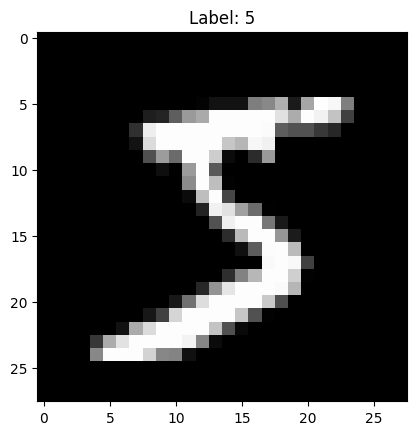

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display a sample image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to fit the model's input shape (28x28x1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [4]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output units for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8736 - loss: 0.4155 - val_accuracy: 0.9846 - val_loss: 0.0517
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9825 - loss: 0.0548 - val_accuracy: 0.9876 - val_loss: 0.0394
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9895 - val_loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9929 - loss: 0.0209 - val_accuracy: 0.9901 - val_loss: 0.0289


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0374
Test accuracy: 0.9901000261306763


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


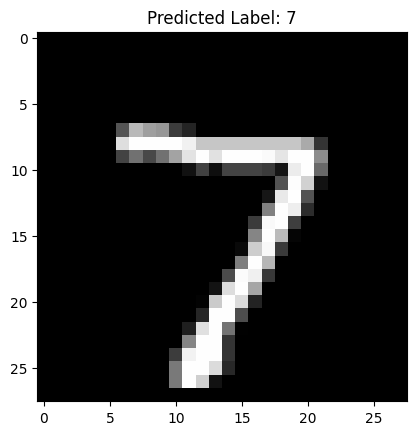

In [7]:
# Predict the first image in the test set
predictions = model.predict(test_images)

# Get the index of the highest predicted probability
predicted_label = np.argmax(predictions[0])

# Show the result
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


In [9]:
# Save the trained model
model.save("handwriting_to_text_model.keras")

In [10]:
# Load the model (optional, if you want to reload later)
loaded_model = tf.keras.models.load_model("handwriting_to_text_model.keras")

# Predict using the loaded model (optional)
new_predictions = loaded_model.predict(test_images)

# Show the prediction for the first test image using the loaded model
loaded_predicted_label = np.argmax(new_predictions[0])
print(f"Loaded Model Predicted Label: {loaded_predicted_label}")

 13/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  

C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loaded Model Predicted Label: 7
